In [2]:
#!pip install tqdm
import numpy as np
import math
import pandas as pd
import os
import time
from tqdm import tqdm

In [3]:
import math

# 점과 점 사이의 거리 구하는 함수
def distance(x1, y1, x2, y2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result

In [4]:
PATH = os.getcwd()

In [5]:
all_cafe = pd.read_excel(PATH + '/군집화 전 진짜 최종 0822.xlsx')

In [6]:
all_cafe.head()

,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord,num_point
0,다사585452,21,강남구,1123064,역삼1동,366,11680640,2622.636,18.164,372.34,482,34,2220000.000,127.031022,37.505592,3
1,다사583456,440,강남구,1123052,논현1동,360,11680521,20072.545,117.325,29.70,60,2,569333.333,127.028737,37.509188,1
2,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1
3,다사584464,23,강남구,1123053,논현2동,361,11680531,1070.405,8.640,45.86,2,4,580000.000,127.030032,37.516449,1
4,다사579456,366,강남구,1123052,논현1동,360,11680521,16903.196,98.800,113.85,214,13,1707999.999,127.024211,37.509170,3


In [7]:
# 해당 구 뽑아오기        !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 구 바꾸기 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

gu_cafe = all_cafe[all_cafe['layer'] == '강남구']

In [8]:
gu_cafe.head()

,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord,num_point
0,다사585452,21,강남구,1123064,역삼1동,366,11680640,2622.636,18.164,372.34,482,34,2220000.000,127.031022,37.505592,3
1,다사583456,440,강남구,1123052,논현1동,360,11680521,20072.545,117.325,29.70,60,2,569333.333,127.028737,37.509188,1
2,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1
3,다사584464,23,강남구,1123053,논현2동,361,11680531,1070.405,8.640,45.86,2,4,580000.000,127.030032,37.516449,1
4,다사579456,366,강남구,1123052,논현1동,360,11680521,16903.196,98.800,113.85,214,13,1707999.999,127.024211,37.509170,3


In [9]:
# 구 군집화한 것들 들고오기                            !!!!!!!!!!!!!!!!!!!!!!!!!!!! 파일 들고오기 !!!!!!!!!!!!!!!!!!!!!!!!!

gu_grid = pd.read_csv(PATH + '/그리드/강남구 그리드.csv', encoding='utf-8')

In [10]:
gu_grid.head()

,gid,강남구
0,다사597458,0
1,다사596459,0
2,다사594467,0
3,다사590465,0
4,다사592464,0


In [11]:
gu_grid['강남구'].unique()    # 해당 구에 군집이 몇개 인지 확인

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [12]:
# 해당 구 카페 그리드와 카페를 군집한 그리드 합치기

rlst= pd.merge(gu_cafe,gu_grid, how= 'left', on='gid')
rlst.head()

,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord,num_point,강남구
0,다사585452,21,강남구,1123064,역삼1동,366,11680640,2622.636,18.164,372.34,482,34,2220000.000,127.031022,37.505592,3,6
1,다사583456,440,강남구,1123052,논현1동,360,11680521,20072.545,117.325,29.70,60,2,569333.333,127.028737,37.509188,1,6
2,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1,0
3,다사584464,23,강남구,1123053,논현2동,361,11680531,1070.405,8.640,45.86,2,4,580000.000,127.030032,37.516449,1,5
4,다사579456,366,강남구,1123052,논현1동,360,11680521,16903.196,98.800,113.85,214,13,1707999.999,127.024211,37.509170,3,6


In [13]:
# 해당 구 클러스터 설정      !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!클러스터 바꿔주기 !!!!!!!!!!!!!!!!!!!

gid =rlst[rlst['강남구'] == 0]
gid.reset_index(drop=True, inplace=True)
gid.head()

,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord,num_point,강남구
0,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1,0
1,다사596459,113,강남구,1123059,삼성2동,363,11680590,3876.523,24.624,146.00,139,5,811000.000,127.043606,37.511983,1,0
2,다사594467,101,강남구,1123078,청담동,378,11680565,4164.911,39.244,184.89,275,856,1312666.666,127.041141,37.519164,2,0
3,다사590465,147,강남구,1123053,논현2동,361,11680531,6422.432,51.840,175.55,1526,706,580000.000,127.036607,37.517332,1,0
4,다사592464,11,강남구,1123053,논현2동,361,11680531,0.000,0.000,150.57,2880,144,580000.000,127.038876,37.516439,1,0


In [14]:
cafe_x = []
cafe_y = []

for i in range(len(gid)):
    cafe_x.append(gid.iloc[i][13])
    cafe_y.append(gid.iloc[i][14])
    
dis = []

for i in range(len(cafe_x)):
    for j in range(len(cafe_x)):
        dis.append(distance(cafe_x[i], cafe_y[i], cafe_x[j], cafe_y[j]))
        
num = round(max(dis) / 0.007882882) # 해당 군집을 재군집 할 때 군집 개수
num

3

In [15]:
# 재 군집 !!!!!!

new_gid = gid.iloc[:, [13, 14]]
new_gid.head()

,x_coord,y_coord
0,127.044566,37.511053
1,127.043606,37.511983
2,127.041141,37.519164
3,127.036607,37.517332
4,127.038876,37.516439


In [16]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(new_gid)

In [17]:
minmax_gid = pd.DataFrame(scaled)
minmax_gid.columns=new_gid.columns
minmax_gid.head()

,x_coord,y_coord
0,0.305784,0.053587
1,0.268921,0.107822
2,0.174301,0.526569
3,0.000214,0.419741
4,0.087312,0.367693


In [18]:
# 필요한 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import sklearn
%matplotlib inline

C:\Users\koko1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


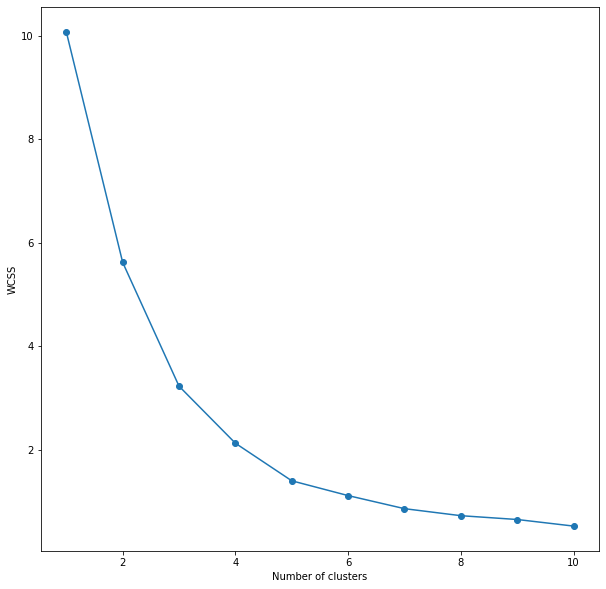

In [19]:
# Elbow method2
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(minmax_gid)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
from sklearn.decomposition import PCA

# 차원축소
pca = PCA(2)
data = pca.fit_transform(minmax_gid)

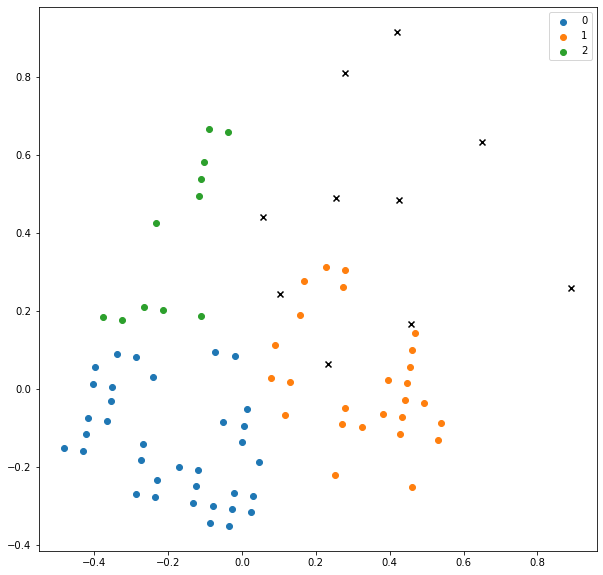

In [21]:
# 군집화 결과
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = num, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [22]:
model.inertia_

3.2275143547693808

In [23]:
cluster = pd.Series(label)

In [24]:
cluster

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    1
69    1
70    0
71    1
Length: 72, dtype: int32

In [25]:
minmax_gid = minmax_gid.reset_index()

In [26]:
minmax_gid = minmax_gid.drop(['index'], axis=1)

In [27]:
new_cluster = pd.concat([minmax_gid, cluster], axis=1)
new_cluster.head()

,x_coord,y_coord,0
0,0.305784,0.053587,0
1,0.268921,0.107822,0
2,0.174301,0.526569,0
3,0.000214,0.419741,0
4,0.087312,0.367693,0


In [28]:
new_cluster.columns = ['x_coord', 'y_coord', 'cluster']
new_cluster.head()

,x_coord,y_coord,cluster
0,0.305784,0.053587,0
1,0.268921,0.107822,0
2,0.174301,0.526569,0
3,0.000214,0.419741,0
4,0.087312,0.367693,0


In [29]:
gid.head()

,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord,num_point,강남구
0,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1,0
1,다사596459,113,강남구,1123059,삼성2동,363,11680590,3876.523,24.624,146.00,139,5,811000.000,127.043606,37.511983,1,0
2,다사594467,101,강남구,1123078,청담동,378,11680565,4164.911,39.244,184.89,275,856,1312666.666,127.041141,37.519164,2,0
3,다사590465,147,강남구,1123053,논현2동,361,11680531,6422.432,51.840,175.55,1526,706,580000.000,127.036607,37.517332,1,0
4,다사592464,11,강남구,1123053,논현2동,361,11680531,0.000,0.000,150.57,2880,144,580000.000,127.038876,37.516439,1,0


In [30]:
new_cluster['gid'] = gid['gid']
new_cluster['pop'] = gid['pop']
new_cluster['living_pop'] = gid['living_pop']
new_cluster['floating_pop'] = gid['floating_pop']
new_cluster['area_sum'] = gid['area_sum']
new_cluster['review_visitor'] = gid['review_visitor']
new_cluster['blog_visitor'] = gid['blog_visitor']
new_cluster['avg_sal_sum'] = gid['avg_sal_sum']
new_cluster['x_coord_1'] = gid['x_coord']
new_cluster['y_coord_1'] = gid['y_coord']
new_cluster['num_point'] = gid['num_point']
new_cluster.head()

,x_coord,y_coord,cluster,gid,pop,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord_1,y_coord_1,num_point
0,0.305784,0.053587,0,다사597458,62,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1
1,0.268921,0.107822,0,다사596459,113,3876.523,24.624,146.00,139,5,811000.000,127.043606,37.511983,1
2,0.174301,0.526569,0,다사594467,101,4164.911,39.244,184.89,275,856,1312666.666,127.041141,37.519164,2
3,0.000214,0.419741,0,다사590465,147,6422.432,51.840,175.55,1526,706,580000.000,127.036607,37.517332,1
4,0.087312,0.367693,0,다사592464,11,0.000,0.000,150.57,2880,144,580000.000,127.038876,37.516439,1


In [31]:
# 뉴 클러스터의 클러스터 불러오기

test = new_cluster[new_cluster['cluster'] == 0]
test.reset_index(drop=True, inplace=True)
test.head()

,x_coord,y_coord,cluster,gid,pop,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord_1,y_coord_1,num_point
0,0.305784,0.053587,0,다사597458,62,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053,1
1,0.268921,0.107822,0,다사596459,113,3876.523,24.624,146.00,139,5,811000.000,127.043606,37.511983,1
2,0.174301,0.526569,0,다사594467,101,4164.911,39.244,184.89,275,856,1312666.666,127.041141,37.519164,2
3,0.000214,0.419741,0,다사590465,147,6422.432,51.840,175.55,1526,706,580000.000,127.036607,37.517332,1
4,0.087312,0.367693,0,다사592464,11,0.000,0.000,150.57,2880,144,580000.000,127.038876,37.516439,1


In [32]:
# 그리드 별 minmax 해서 가중치 계싼하기

test_w = test.iloc[:, [4, 5, 6, 7, 8, 9, 10]]
test_w.head()

,pop,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum
0,62,1938.262,12.312,25.90,404,36,811000.000
1,113,3876.523,24.624,146.00,139,5,811000.000
2,101,4164.911,39.244,184.89,275,856,1312666.666
3,147,6422.432,51.840,175.55,1526,706,580000.000
4,11,0.000,0.000,150.57,2880,144,580000.000


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(test_w)

weight = pd.DataFrame(scaled)
weight.columns=test_w.columns
weight.head()

,pop,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum
0,0.051463,0.064516,0.052288,0.062508,0.139680,0.031169,0.132759
1,0.102926,0.129032,0.104576,0.451483,0.047603,0.004329,0.132759
2,0.090817,0.138631,0.166667,0.577439,0.094858,0.741126,0.421073
3,0.137235,0.213774,0.220161,0.547189,0.529534,0.611255,0.000000
4,0.000000,0.000000,0.000000,0.466284,1.000000,0.124675,0.000000


In [34]:
weight['all_sum'] = weight.sum(axis=1)

In [35]:
weight.head()

,pop,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,all_sum
0,0.051463,0.064516,0.052288,0.062508,0.139680,0.031169,0.132759,0.534383
1,0.102926,0.129032,0.104576,0.451483,0.047603,0.004329,0.132759,0.972709
2,0.090817,0.138631,0.166667,0.577439,0.094858,0.741126,0.421073,2.230610
3,0.137235,0.213774,0.220161,0.547189,0.529534,0.611255,0.000000,2.259149
4,0.000000,0.000000,0.000000,0.466284,1.000000,0.124675,0.000000,1.590960


In [36]:
rlst = test.iloc[:, [3, 2,  11, 12, 13]]
rlst.head()

,gid,cluster,x_coord_1,y_coord_1,num_point
0,다사597458,0,127.044566,37.511053,1
1,다사596459,0,127.043606,37.511983,1
2,다사594467,0,127.041141,37.519164,2
3,다사590465,0,127.036607,37.517332,1
4,다사592464,0,127.038876,37.516439,1


In [37]:
# 군집된 카페 그리드에서 가중치 합치기

rlst = pd.concat([rlst,weight['all_sum']],axis=1)
rlst.head()

,gid,cluster,x_coord_1,y_coord_1,num_point,all_sum
0,다사597458,0,127.044566,37.511053,1,0.534383
1,다사596459,0,127.043606,37.511983,1,0.972709
2,다사594467,0,127.041141,37.519164,2,2.230610
3,다사590465,0,127.036607,37.517332,1,2.259149
4,다사592464,0,127.038876,37.516439,1,1.590960


In [38]:
rlst['weight'] = rlst[['num_point', 'all_sum']].sum(axis=1)
rlst.head()   # 최종 데이터 프레임

,gid,cluster,x_coord_1,y_coord_1,num_point,all_sum,weight
0,다사597458,0,127.044566,37.511053,1,0.534383,1.534383
1,다사596459,0,127.043606,37.511983,1,0.972709,1.972709
2,다사594467,0,127.041141,37.519164,2,2.230610,4.230610
3,다사590465,0,127.036607,37.517332,1,2.259149,3.259149
4,다사592464,0,127.038876,37.516439,1,1.590960,2.590960


In [40]:
candi_grid = pd.read_csv(PATH + '/포인트/강남구 포인트.csv', encoding='utf-8')
candi_grid = candi_grid[candi_grid['NUMPOINTS'] == 0]
candi_grid = candi_grid.iloc[:, [0, 16, 17]]
candi_grid = candi_grid.reset_index()
candi_grid = candi_grid.drop(['index'], axis=1)
candi_grid.head()

,gid,xcoord,ycoord
0,다사579454,127.024223,37.507368
1,다사595438,127.042358,37.493163
2,다사595438,127.042520,37.492737
3,다사584464,127.029493,37.516332
4,다사587471,127.033178,37.522726


In [41]:
candidate_x = []
candidate_y = []
candidate_i = []

for i in range(len(candi_grid)):
    candidate_x.append(candi_grid.loc[i][1])
    candidate_y.append(candi_grid.loc[i][2])
    candidate_i.append(candi_grid.loc[i][0])

In [42]:
cafe_x = []
cafe_y = []
cafe_w = []

for i in range(len(rlst)):
    cafe_x.append(rlst.iloc[i][2])
    cafe_y.append(rlst.iloc[i][3])
    cafe_w.append(rlst.iloc[i][6])

In [46]:
dtc = sum([distance(x, y, candidate_x[0], candidate_y[0])*w for x, y, w in zip(cafe_x, cafe_y, cafe_w)])

for i in range(len(candidate_x)):
    dist = sum([distance(x, y, candidate_x[i], candidate_y[i])*w for x, y, w in zip(cafe_x, cafe_y, cafe_w)])
    if dist < dtc:
        dtc = dist
        idx = i

In [47]:
dtc

0.4789389532983942

In [48]:
candidate_i[idx]

'다사594463'